## Customer sentiment analysis- Hotel reviews

In [2]:
## Import necessary packages
import bz2
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import sklearn.feature_extraction.text as text
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import words
import nltk
from string import printable
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

In [4]:
## Converting into pandas df
df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,dateSeen,rating,sourceURLs,text,title,userCity,userProvince,username,sourceURLs.1,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [10]:
df['text']=df['text'].astype('str')

### Cleaning the data

In [11]:
## Defining empty list
ReviewText_1=[]

In [12]:
## Removing unwanted/special characters
for i in df['text']:
    i = re.sub('[^A-Za-z0-9 .:-]+', '', i)
    i = re.sub(' +',' ',i)
    ReviewText_1.append(i)

In [13]:
df['text']=ReviewText_1

In [14]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,dateSeen,rating,sourceURLs,text,title,userCity,userProvince,username,sourceURLs.1,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [15]:
df.dtypes

id                    object
dateAdded             object
dateUpdated           object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
name                  object
postalCode            object
province              object
date                  object
dateSeen              object
rating               float64
sourceURLs            object
text                  object
title                 object
userCity              object
userProvince          object
username              object
sourceURLs.1          object
websites              object
dtype: object

In [17]:
## Filtering based on ratings
positive_lis=df.loc[df['rating'] >= 3]
negative_lis=df.loc[df['rating'] < 3]

In [20]:
#remove the non ascii code
positive_lis['text'] = positive_lis['text'].apply(lambda x: ''.join(' ' if ord(i) < 32 or ord(i) > 126 else i for i in x))
negative_lis['text'] = negative_lis['text'].apply(lambda x: ''.join(' ' if ord(i) < 32 or ord(i) > 126 else i for i in x))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
positive = positive_lis['rating'].count()
negative = negative_lis['rating'].count()

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

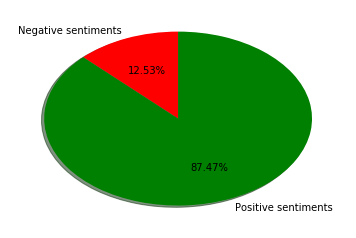

In [22]:
slices_hours = [negative, positive]
activities = ['Negative sentiments', 'Positive sentiments']
colors = ['r', 'g']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%1.2f%%',shadow=True)
plt

### Positive sentiments

In [23]:
top_rating_list = list(positive_lis['text'])
top_rating_text = ' '.join(top_rating_list)

In [26]:
stopwords = set(STOPWORDS)
stopwords.add('room')
stopwords.add('hotel')
stopwords.add('good')
stopwords.add('great')
stopwords.add('nice')

(-0.5, 999.5, 499.5, -0.5)

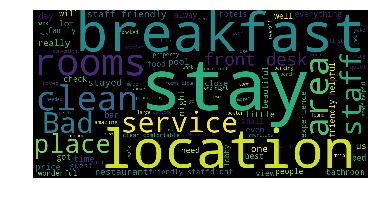

In [27]:
wordcloud = WordCloud(width=1000, height=500, max_words=100, stopwords=stopwords).generate(top_rating_text)
plt.imshow(wordcloud)
plt.axis('off')

In [28]:
def topic_analsis(comments, x, y):
    """performs the Topic Analysis
    
    :param comments: pandas series of survey response phrases as strings
    :param x: number of topics as an int
    :param y: number of top words from each topic
    :return: list of topic word frequencies
    """
    comments = list(comments)
#     for i in range(len(comments)):
#         comments[i] = str(comments[i])
        
    # This step performs the vectorization,
    # tf-idf, stop word extraction, and normalization.
    # It assumes docs is a Python list,
    #with reviews as its elements.
    docs = comments
    cv = text.TfidfVectorizer(docs, stop_words='english')
    doc_term_matrix = cv.fit_transform(docs)
 
    # The tokens can be extracted as:
    vocab = cv.get_feature_names()
    print(len(vocab))

    # Next we perform the NMF with x topics
    #from sklearn import decomposition
    num_topics = x
 
    #doctopic is the W matrix
    decomp = decomposition.NMF(n_components = num_topics,
             init = 'nndsvd')
    doctopic = decomp.fit_transform(doc_term_matrix)
 
    # Now, we loop through each row of the T matrix
    # i.e. each topic,
    # and collect the top y words from each topic.
    n_top_words = y
    
#    topic_words = []
#    weights = []
    topic_word_freq = []
    for topic in decomp.components_:
        idx = np.argsort(topic)[::-1][0:n_top_words]
        topic_words = [vocab[i] for i in idx]
        weight_value = np.sort(topic)[::-1][0:n_top_words]
        weight_value = [int(round(elem*100)) for elem in weight_value]
#        topic_words.append([vocab[i] for i in idx])
#        weights.append(weight_value)
        topic_word_freq.append(sum([[topic_words[i]] * weight_value[i] for i in range(len(topic_words))], []))
    # view topics
#     for topic in topic_words:
#         print topic
#         print "\n------------"
#     for weight in weights:
#         print weight
#         print "\n------------"
#     for topic in topic_word_freq[0:3]:
#         print topic
#         print "\n------------"
    return topic_word_freq

In [29]:
all_ratings = positive_lis['text']

In [30]:
topic_words_list_detractor = topic_analsis(all_ratings, 10, 30)

15403


In [31]:
test = ' '.join(topic_words_list_detractor[3])

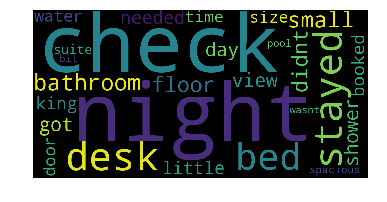

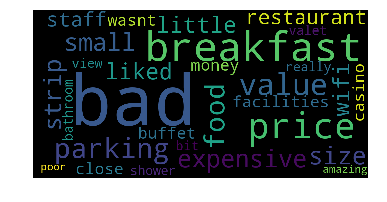

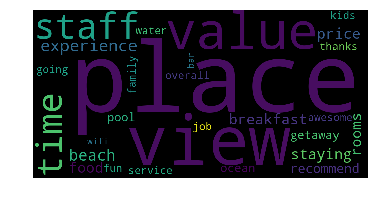

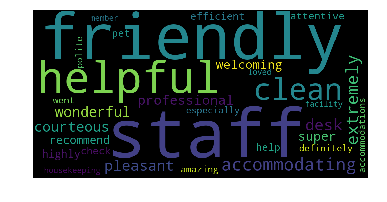

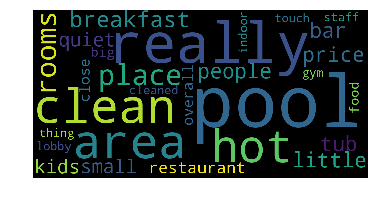

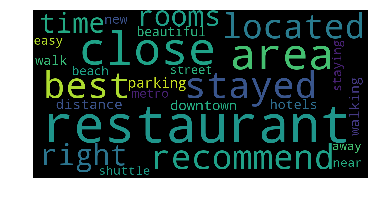

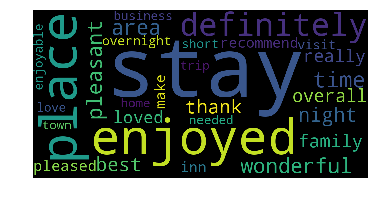

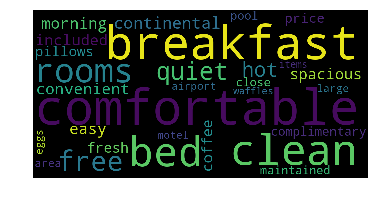

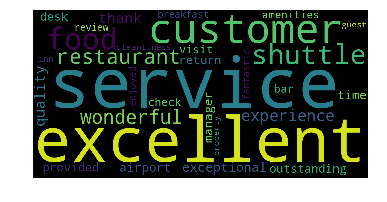

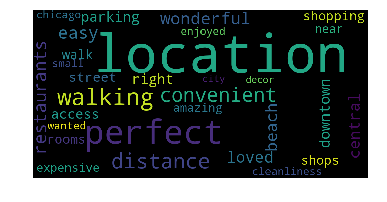

In [32]:
for word_list in topic_words_list_detractor:
    cloud_string = ' '.join(word_list)
    wordcloud = WordCloud(width=1000, height=500, max_words=100, stopwords=stopwords,collocations=False).generate(cloud_string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')

## Most popular topics
1. Excelent service
2. Clean bed and environment
3. Perfect location
4. Customer enjoyed the stay
5. Great ammenities
6. Friendly and courteous staff


## N gram

#### The above popular topic words will help us to deep dive more into the matter

In [33]:
irregular_detr = positive_lis[(pd.notnull(positive_lis['text']))][['text']].drop_duplicates()
#print irregular.count()
#print irregular.head()
irregular_detr.head()

,text
0,Our experience at Rancho Valencia was absolute...
1,Amazing place. Everyone was extremely warm and...
2,We booked a 3 night stay at Rancho Valencia to...
4,I live in Md and the Aloft is my Home away fro...
5,I stayed here with my family for my daughters ...


In [34]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraj.patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suraj.patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')

pattern = r"""(?x)                   # set flag to allow verbose regexps
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
              |(?:[+/\-@&*])         # special characters with meanings
            """

tokenizer = RegexpTokenizer(pattern)
stops = set(stopwords.words("english"))
stops.update(['hotel','location', 'service','booked','breakfast','clean','staff','com','online']) ## as per the word cloud
stops.remove('not')

def remove_stopwords(c):
  return ' '.join([word for word in tokenizer.tokenize(c.text.lower()) if word not in stops])
  #return ' '.join(list(set(tokenizer.tokenize(c.free_text_decoded)) - set(nltk.corpus.stopwords.words('english'))))
    
irregular_detr['p_openend'] = irregular_detr.apply(remove_stopwords, axis=1)


#sys.setdefaultencoding('utf8')
import sys
if sys.version[0] == '2':
    from importlib import reload
    reload (sys)
    sys.setdefaultencoding("utf-8")

#str(oet.free_text).encode('utf8')

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#Running lemmatization on stopwords removed text
wordnet_lemmatizer = WordNetLemmatizer()
irregular_detr['lemmatized'] = irregular_detr.p_openend.map(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(y) for y in x.split(' ')]))

#Running stemming on lemmatized text
stemmer = SnowballStemmer("english")
irregular_detr['stemmed'] = irregular_detr.lemmatized.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))

#irregular.head()

In [38]:
#Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.50, ngram_range=(3,5))
#cvec

# Calculate all the n-grams found in all documents
from itertools import islice
cvec.fit(irregular_detr.lemmatized)
list(islice(cvec.vocabulary_.items(), 5))

# Check how many total n-grams we have
print (len(cvec.vocabulary_))
cvec_counts = cvec.transform(irregular_detr.lemmatized)
import numpy as np
import pandas as pd
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
#counts_df.sort_values(by='occurrences', ascending=False).head(10)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)
#weights_df.sort_values(by='weight', ascending=False).tail(20)

542358


,term,weight
206201,great place stay,0.000901
400619,room bed comfortable,0.000559
401995,room comfortable bed,0.000523
46402,bed comfortable room,0.000515
181871,friendly helpful room,0.000483
356842,pool hot tub,0.000455
312693,nice place stay,0.000430
196564,good place stay,0.000383
414558,room spacious comfortable,0.000371
194766,good great room,0.000367


### Negative Ratings

In [53]:
all_ratings = negative_lis['text'].astype('str')

In [54]:
topic_words_list_detractor = topic_analsis(all_ratings, 10, 30)

6305


In [55]:
test = ' '.join(topic_words_list_detractor[3])

In [56]:
stopwords = set(STOPWORDS)
stopwords.add('room')
stopwords.add('hotel')
stopwords.add('said')
stopwords.add('told')
stopwords.add('time')
stopwords.add('called')

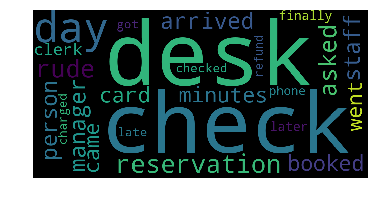

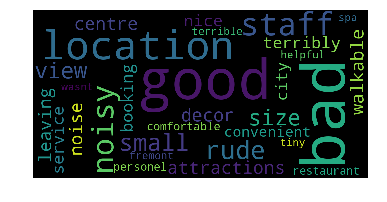

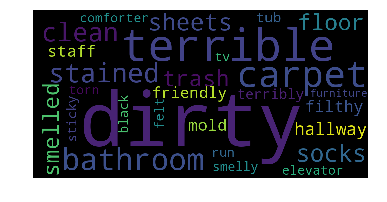

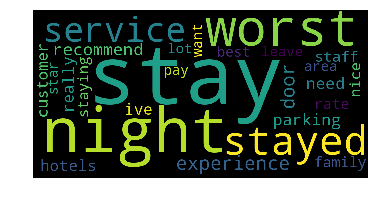

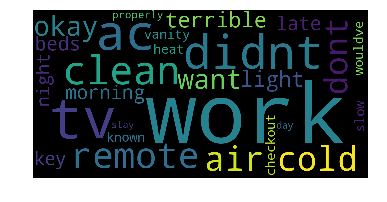

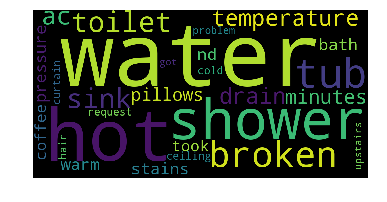

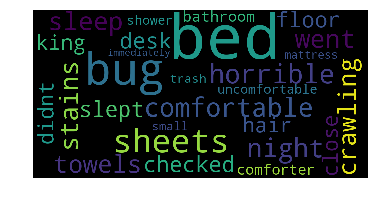

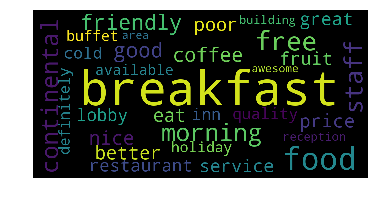

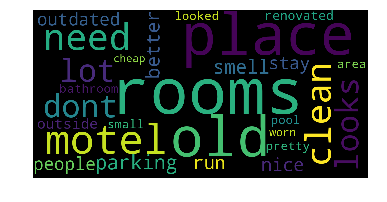

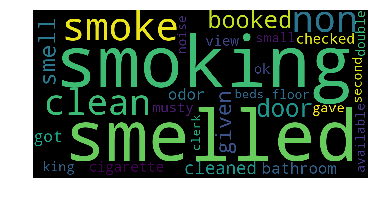

In [57]:
for word_list in topic_words_list_detractor:
    cloud_string = ' '.join(word_list)
    wordcloud = WordCloud(width=1000, height=500, max_words=100, stopwords=stopwords,collocations=False).generate(cloud_string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')

In [39]:
irregular_detr = negative_lis[(pd.notnull(negative_lis['text']))][['text']].drop_duplicates()
#print irregular.count()
#print irregular.head()
irregular_detr.head()

,text
3,Currently in bed writing this for the past hr ...
26,After getting the bait and switch I decided Id...
27,We had no choice but to stay here when a torna...
30,heat in room did not work properly tv remote w...
102,Staff werent helpful and no one tried to come ...


In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')

pattern = r"""(?x)                   # set flag to allow verbose regexps
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
              |(?:[+/\-@&*])         # special characters with meanings
            """

tokenizer = RegexpTokenizer(pattern)
stops = set(stopwords.words("english"))
stops.update(['hotel','location', 'service','rooms','breakfast','clean','staff','smoking','water','desk'])
stops.remove('not')

def remove_stopwords(c):
  return ' '.join([word for word in tokenizer.tokenize(c.text.lower()) if word not in stops])
  #return ' '.join(list(set(tokenizer.tokenize(c.free_text_decoded)) - set(nltk.corpus.stopwords.words('english'))))
    
irregular_detr['p_openend'] = irregular_detr.apply(remove_stopwords, axis=1)


#sys.setdefaultencoding('utf8')
import sys
if sys.version[0] == '2':
    from importlib import reload
    reload (sys)
    sys.setdefaultencoding("utf-8")

#str(oet.free_text).encode('utf8')

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#Running lemmatization on stopwords removed text
wordnet_lemmatizer = WordNetLemmatizer()
irregular_detr['lemmatized'] = irregular_detr.p_openend.map(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(y) for y in x.split(' ')]))

#Running stemming on lemmatized text
stemmer = SnowballStemmer("english")
irregular_detr['stemmed'] = irregular_detr.lemmatized.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))

#irregular.head()

In [60]:
#Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.50, ngram_range=(3,5))
#cvec

# Calculate all the n-grams found in all documents
from itertools import islice
cvec.fit(irregular_detr.lemmatized)
list(islice(cvec.vocabulary_.items(), 5))

# Check how many total n-grams we have
print (len(cvec.vocabulary_))
cvec_counts = cvec.transform(irregular_detr.lemmatized)
import numpy as np
import pandas as pd
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
#counts_df.sort_values(by='occurrences', ascending=False).head(10)

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)
#weights_df.sort_values(by='weight', ascending=False).tail(20)

101431


,term,weight
81034,sleeep street motel,0.000799
36731,good ac work,0.000799
88450,terrible dirty bathroom,0.000799
41538,horrible neighborhood unclean,0.000799
23714,decide book disappointed,0.000799
88512,terrible room dirty,0.000799
58572,non smoking room,0.000732
75768,room smelled like,0.000724
75801,room smelled musty,0.000711
85702,stayed night room,0.000477
